<a href="https://colab.research.google.com/github/vivek86-ai/German_Traffic_ImageClassification/blob/master/German_Traffic_Sign_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Necessary libraries
import numpy as np
import pandas as pd

import os
from PIL import Image
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


import keras as keras
from keras.models import Sequential
from keras.layers import Dense, MaxPool2D, Conv2D, Flatten, Dropout, BatchNormalization
from keras.utils import to_categorical

Using TensorFlow backend.


In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("gdrive/My Drive/Traffic_Sign.zip", 'r')
zip_ref.extractall("/tmp")
zip_ref.close()

In [ ]:
data = []
labels = []
classes = 43

In [ ]:
#Directory path
dir_path = "/tmp"

In [ ]:
for i in range(classes):
  path = os.path.join(dir_path,"Train", str(i))
  #print(path)
  images = os.listdir(path)
  #print(images)
  for a in images:
    try:
      image = Image.open(path + '/' + a)
      #Resizing the image
      image = image.resize((30,30))
      image = np.array(image)

      data.append(image)
      labels.append(i)
    except:
      print("Error loading data", i)
  


In [ ]:
#Converting data and Labels into array
data = np.array(data)
labels = np.array(labels)

In [ ]:
#Checking shape of data and labels
print(data.shape)
print(labels.shape)

(39209, 30, 30, 3)
(39209,)


In [ ]:
#Using trin_test_split, splitting the data
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=1)


print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(31367, 30, 30, 3) (31367,)
(7842, 30, 30, 3) (7842,)


In [ ]:
#Encoding the labels 
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(31367, 30, 30, 3) (31367, 43)
(7842, 30, 30, 3) (7842, 43)


In [ ]:
#Building CNN Model
model=Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation="relu", input_shape = x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(BatchNormalization())


model.add(Conv2D(filters=64, kernel_size=(5,5), activation="relu"))
model.add(Conv2D(filters=64, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(43, activation='softmax'))



In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 64)          51264     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 64)         

In [ ]:
#Compilation of the model
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(31367, 30, 30, 3) (31367, 43)
(7842, 30, 30, 3) (7842, 43)


In [ ]:
#Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=1, validation_data=(x_test, y_test))

Train on 31367 samples, validate on 7842 samples
Epoch 1/10
31367/31367 [==============================] - 12s 382us/step - loss: 0.9539 - accuracy: 0.7509 - val_loss: 0.1244 - val_accuracy: 0.9718
Epoch 2/10
31367/31367 [==============================] - 4s 140us/step - loss: 0.1661 - accuracy: 0.9519 - val_loss: 0.1010 - val_accuracy: 0.9695
Epoch 3/10
31367/31367 [==============================] - 5s 146us/step - loss: 0.1130 - accuracy: 0.9661 - val_loss: 0.0531 - val_accuracy: 0.9836
Epoch 4/10
31367/31367 [==============================] - 4s 138us/step - loss: 0.0877 - accuracy: 0.9742 - val_loss: 0.0196 - val_accuracy: 0.9948
Epoch 5/10
31367/31367 [==============================] - 4s 142us/step - loss: 0.0627 - accuracy: 0.9812 - val_loss: 0.0172 - val_accuracy: 0.9959
Epoch 6/10
31367/31367 [==============================] - 4s 139us/step - loss: 0.0517 - accuracy: 0.9835 - val_loss: 0.0136 - val_accuracy: 0.9971
Epoch 7/10
31367/31367 [==============================] - 4s 1

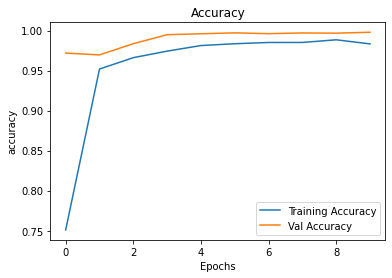

In [ ]:
#We have just ran for 10 epochs and got 99% accuracy. Now we wil plot the graph

#Accuracy 
plt.figure()
plt.plot(history.history['accuracy'],label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label="Val Accuracy")
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')
plt.legend()

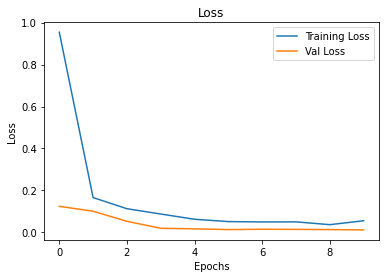

In [ ]:
#Loss

plt.figure()
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Val Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()


In [ ]:
#Test the model
y_val = pd.read_csv(os.path.join(dir_path, "Test.csv"))
y_val.head(2)

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,53,54,6,5,48,49,16,Test/00000.png
1,42,45,5,5,36,40,1,Test/00001.png


In [ ]:
labels = y_val['ClassId'].values
imgs = y_val["Path"].values

In [ ]:
data = []

In [ ]:
for img in imgs:
  image = Image.open(os.path.join(dir_path,img))
  image = image.resize((30,30))
  image = np.array(image)
  data.append(image)

x_val = np.array(data)


In [ ]:
#Prediction
predict = model.predict_classes(x_val)

In [ ]:
#Accuracy with the test data
from sklearn.metrics import accuracy_score
accuracy_score(labels,predict)

0.9724465558194775

In [ ]:
#Saving the Model
model.save("Traffic_Classifier.h5")

In [ ]:
#Now testing any other image

dir = os.getcwd()
print(dir)

/content


In [ ]:
#LOADING SAVED MODEL
from keras.models import load_model
model_traffic_classifier = load_model('Traffic_Classifier.h5')

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 5.png to 5 (2).png


In [ ]:
import cv2

In [ ]:
img = cv2.imread("/content/0.png")
image = cv2.resize(img, (30,30))
image= np.expand_dims(image, axis=0)
image = np.array(image)


In [ ]:
image.shape

(1, 30, 30, 3)

In [ ]:
pred = model_traffic_classifier.predict_classes([image])[0]

In [ ]:
#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }

In [ ]:
sign = classes[pred+1]
print(sign)

Speed limit (20km/h)
